#  Accident Data: Modeling and Evaluation Steps
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
import pickle

In [24]:
#Load data previously prepared for modeling
df = pd.read_pickle('accident_data_for_classification.pkl')

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week,Start_Date,time_of_day,hour_of_day,Holiday,precipitation_data_present,end_coordinates_present,windchill_data_present
0,A-1,MapQuest,1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday,2016-02-08,05:46:00,5,False,True,False,False
1,A-2,MapQuest,0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,100.0,29.65,10.0,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday,2016-02-08,06:07:59,6,False,True,False,False
2,A-3,MapQuest,0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,100.0,29.67,10.0,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,Monday,2016-02-08,06:49:27,6,False,False,False,True
3,A-4,MapQuest,1,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,96.0,29.64,9.0,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,Monday,2016-02-08,07:23:34,7,False,False,False,True
4,A-5,MapQuest,0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,89.0,29.65,6.0,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,Monday,2016-02-08,07:39:07,7,False,False,False,True


# Baseline Model

Establish a baseline model against which other models can be compared.
The baseline model predicts all accidents will be similar to the majority class, i.e. low Severity (0).  

In [28]:
df['Severity'].value_counts() #Majority class is 0 

0    2438264
1     964491
Name: Severity, dtype: int64

In [5]:
baseline = np.empty(len(df['Severity']))
baseline.fill(0) # Make all predictions 0 i.e. low severity
baseline

array([0., 0., 0., ..., 0., 0., 0.])

**Evaluate Baseline Model using classification report and confusion matrix**

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def measure_performance(actual_val, prediction_val):
    '''
    Evaluates model performance by comparing actual value to predicted value.
    Returns performance measures: accuracy, recall, precision and f1-score.
    '''
    print(classification_report(actual_val, prediction_val))
    print(confusion_matrix(actual_val, prediction_val))

In [8]:
measure_performance(df['Severity'], baseline) 

/Users/annette/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.72      1.00      0.83   2438264
           1       0.00      0.00      0.00    964491

    accuracy                           0.72   3402755
   macro avg       0.36      0.50      0.42   3402755
weighted avg       0.51      0.72      0.60   3402755

[[2438264       0]
 [ 964491       0]]


**Baseline Model Accuracy: 72 %**

# Identify Features and Target Variable

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'day_of_week', 'Start_Date', 'time_of_day',
       'hour_of_day', 'Holiday', 'precipitation_data_present',
       'end_coordinates_present', 'windchill_data_present'],
      dtype='object')

In [10]:
X = df[['Distance(mi)','Side','State', 'Temperature(F)', 'Humidity(%)',
        'Pressure(in)','Visibility(mi)', 'Wind_Direction',  'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight','day_of_week','hour_of_day', 'Holiday',
        'precipitation_data_present','end_coordinates_present', 'windchill_data_present']]
# 'Airport_Code','Country','Timezone','Nautical_Twilight','Astronomical_Twilight',
#'Weather_Condition',

In [11]:
y = df['Severity']

**Create Dummy Variables for Categorical Data**

In [12]:
X = pd.get_dummies(X, drop_first = True)

In [13]:
X.shape

(3402755, 103)

**Split Data into Train and Test Sets**

In [14]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 98)

# 1. Logistic Regression

## Modeling

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lm = LogisticRegression(solver = 'lbfgs') #(solver = 'lbfgs', max_iter=500)
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

/Users/annette/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Evaluation

In [17]:
measure_performance(y_test, predictions) 

              precision    recall  f1-score   support

           0       0.78      0.92      0.84    487980
           1       0.62      0.33      0.43    192571

    accuracy                           0.75    680551
   macro avg       0.70      0.62      0.64    680551
weighted avg       0.73      0.75      0.73    680551

[[448908  39072]
 [129046  63525]]


**Logistic Regression Model Accuracy: 75%**

In [18]:
lm.coef_.shape

(1, 103)

In [19]:
X.columns.shape

(103,)

In [20]:
coeffs = pd.DataFrame(lm.coef_.transpose(), X.columns, columns =['Coefficients'])

In [21]:
coeffs.sort_values(by = 'Coefficients', ascending = False)

,Coefficients
Side_R,0.852465
State_GA,0.607404
day_of_week_Saturday,0.558659
day_of_week_Sunday,0.530822
Junction,0.484350
State_IL,0.443462
State_MO,0.351843
State_VA,0.315296
State_CO,0.302236
State_FL,0.185846


# 2. Random Forest

## Modeling

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
rf_predictions = rf.predict(X_test)

## Evaluation

In [ ]:
print(classification_report(y_test, rf_predictions))

**Image**
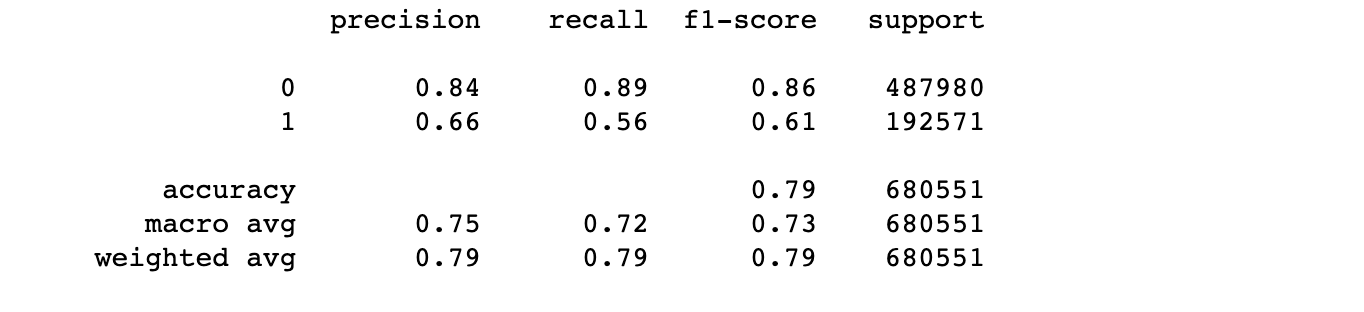

**Random Forest Classifier Accuracy: 79%**